In [1]:
import os
from osgeo import gdal

In [7]:
import matplotlib.pyplot as plt
import numpy as np

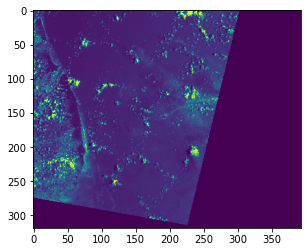

In [23]:
ds = gdal.Open("rgb4.tif")
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

In [24]:
np.histogram(array)

(array([71971, 38774,  6715,  2795,  1543,   953,   679,   468,   380,
          770], dtype=int64),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

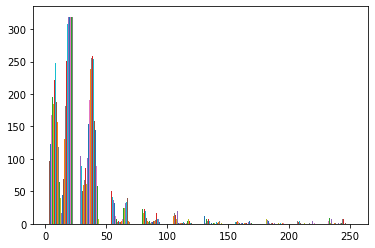

In [25]:
plt.hist(array)
plt.show()

In [26]:
os.chdir(r'C:\Users\User\Desktop\sandeep\raster\data')

#importing three band blue, green and red from landsat8 data
blue_band = 'RGB2.byte.tif'
green_band = 'RGBA.byte.tif'
red_band = 'RGB.byte.tif'
#opening the blue band using gdal
in_ds = gdal.Open(blue_band) 

in_band = in_ds.GetRasterBand(1)

In [27]:
#creating the three_band geotiff with the same properties like blue band
gtiff_driver = gdal.GetDriverByName('GTiff')
out_ds = gtiff_driver.Create('natural_color_img.tif', in_band.XSize, in_band.YSize,3, in_band.DataType)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())


0

In [28]:
#copy pixel data from input band to band1 of output
in_data = in_band.ReadAsArray()
out_band = out_ds.GetRasterBand(1)
out_band.WriteArray(in_data)

0